In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\aravi\Downloads\Student_Performance.xlsx'
data = pd.read_excel(file_path)

In [3]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'No': 0, 'Yes': 1})


In [4]:
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

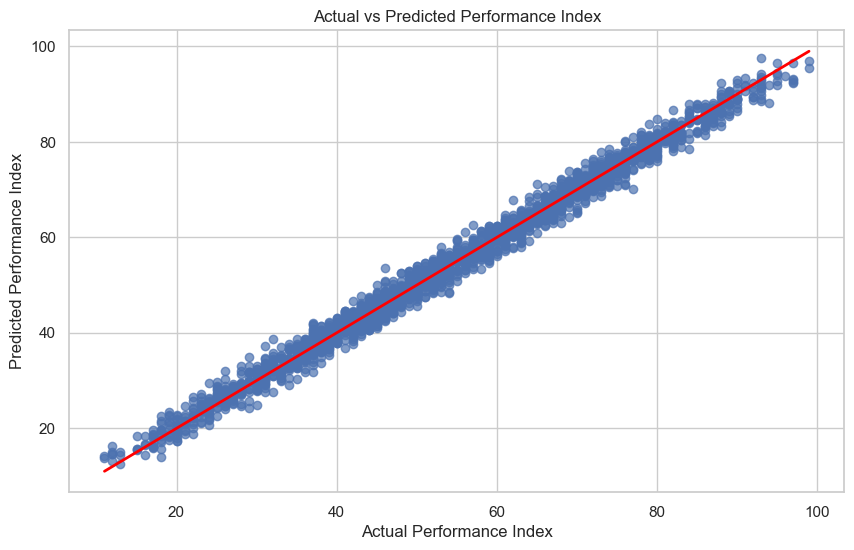

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

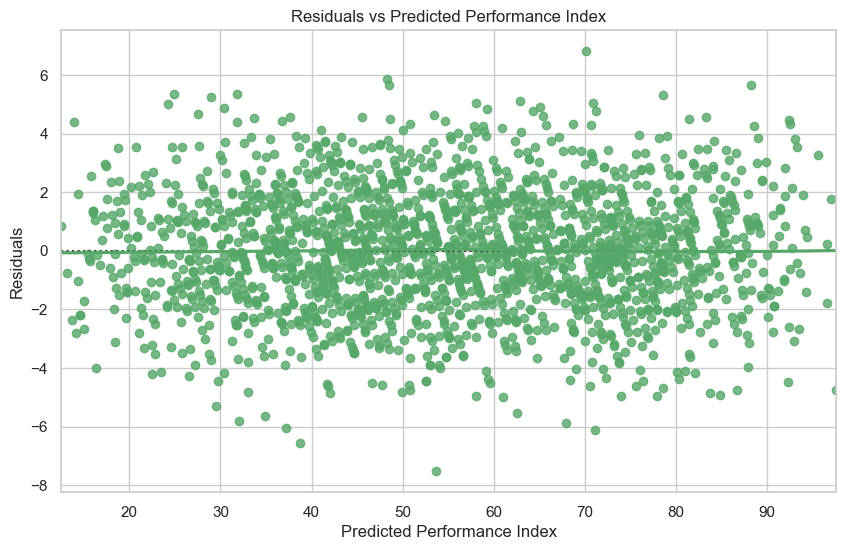

In [9]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.xlabel('Predicted Performance Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Performance Index')
plt.show()

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4.082628398521856
R-squared (R²): 0.9889832909573145


In [ ]:
def predict_performance_index():
    # Get user input
    hours_studied = float(input("Enter hours studied: "))
    previous_scores = float(input("Enter previous scores: "))
    extracurricular_activities = input("Participate in extracurricular activities (Yes/No): ")
    extracurricular_activities = 1 if extracurricular_activities.lower() == 'yes' else 0
    sleep_hours = float(input("Enter sleep hours: "))
    sample_question_papers_practiced = float(input("Enter number of sample question papers practiced: "))
    
    input_data = pd.DataFrame({
        'Hours Studied': [hours_studied],
        'Previous Scores': [previous_scores],
        'Extracurricular Activities': [extracurricular_activities],
        'Sleep Hours': [sleep_hours],
        'Sample Question Papers Practiced': [sample_question_papers_practiced]
    })
    
    prediction = model.predict(input_data)
    
    print(f"Predicted Performance Index: {prediction[0]}")

predict_performance_index()